---

# Hypoxia MAP

In [1]:
import numpy as np
from datascience import *

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

import  seaborn as sns
import pandas as pd

---

## Description

The dataset represents data from the study by [Turan et al.](https://www.or.org/bibliography/PDF/3634706841/Turan,%20Hypoxemia%20&%20SDB.pdf) “Relationship between Chronic Intermittent Hypoxia and
Intraoperative Mean Arterial Pressure in Obstructive Sleep
Apnea Patients Having Laparoscopic Bariatric Surgery”. Anesthesiology 2015; 122: 64-71.

---

## Background

Sleep apnea is when ones breath becomes very shallow or one may even stop breathing -- briefly -- while they sleep. These episodes of decreased breathing, called "apneas" (literally, "without breath"), typically last 20 to 40 seconds. It can happen many times a night in some people. Obstructive sleep apnea (OSA) happens when something partly or completely blocks your upper airway during sleep. Approximately 30% of the general population suffers from OSA. OSA is usually associated with a reduction in blood oxygen saturation. 

An "event" can be either an apnea, characterized by complete cessation of airflow for at least 10 seconds, or a hypopnea in which airflow decreases by 50 percent for 10 seconds or decreases by 30 percent if there is an associated decrease in the oxygen saturation or an arousal from sleep. **To grade the severity of sleep apnea, the number of events per hour is reported as the apnea-hypopnea index (AHI)**. An AHI of less than 5 is considered normal. An AHI of 5-15 is mild; 15-30 is moderate and more than 30 events per hour characterizes severe sleep apnea. 

OSA has been linked to cardiovascular disease, while a diagnosis of moderate-to-severe disease (AHI ≥ 15) has been identified as an independent risk factor for all-cause and cardiovascular mortality. Patients suffering from OSA present with a chronic enhancement in sympathetic adrenergic activity (system involved in maintaining homeostasis) that is considered one of the major mechanisms in the development of cardiovascular health issues in this population. OSA patients may therefore be especially at risk for intraoperative and postoperative morbidity consequent to hemodynamic instability.

This study retrospectively examined the intraoperative blood pressure in patients who had laparoscopic bariatric surgery. Specifically, **testing the hypothesis that nocturnal intermittent hypoxia consequent to OSA are associated with decreased intraoperative mean arterial pressure (MAP)**.

Eligible were all patients who had laparoscopic bariatric procedures between June 2005 and December 2009 and had a diagnosis of OSA within two preoperative years (*N = 281*). **The main exposure variables were the percentage of total sleep time spent at Sao2 less than 90% and the minimum nocturnal Sao2 listed in polysomnography reports, two parameters indicating the nocturnal oxygenation status of the patients with OSA. Time-weighted average (TWA) intraoperative MAP was the main outcome in the analysis**. MAP is a term used to describe an average blood pressure in an individual. It is believed that a MAP > 70 mmHg is enough to sustain the organs of the average person. MAP is normally between 65 and 110 mmHg. If the MAP falls below this number for an appreciable time, vital organs will not get enough oxygen perfusion, and will become hypoxic, a condition called ischemia.

A planned secondary analyses evaluated the relationship between percentage of total sleep time spent at Sao2 less than 90% and minimum nocturnal Sao2, and intraoperative use of vasopressor (yes vs. no). A vasopressor is any medication that tends to raise reduced blood pressure, including ephedrine, epinephrine, and phenylephrine.

---

## Dataset: Hypoxia MAP

In [2]:
hypoxia_map = Table.read_table("HypoxiaMAP.csv") # reading in our dataset
hypoxia_map.show(5)

Age,Female,Race,BMI,Sleeptime,Min Sao2,AHI,Smoking,Diabetes,Hyper,CAD,Preop AntiHyper Med,CPAP,Type Surg,Duration Surg,Duration Surg1,Duration Surg2,TWA MAP,TWA MAP1,TWA MAP2,TWA HR,TWA HR1,TWA HR2,Intraop AntiHyper Med,Vasopressor,Ephedrine,Ephedrine Amt,Epinephrine,Epinephrine Amt,Phenylephrine,Phenylephrine Amt,MAC,Propofol Induction,IV Morphine Eq,Crystalloids,Colloids
29.9,Yes,Caucasian,44.5,0.9,90,AHI < 5,No,No,No,No,No,No,Gastric restrictive procedure,2.9,1,1.7,80.13,67.92,87.43,75.07,73.17,75.87,No,No,No,0,No,0,No,0,1.52,150,25,2400,1000
52.2,Yes,Caucasian,40.6,0,94,15 <= AHI < 30,Yes,Yes,Yes,No,No,No,Gastroenterostomy,4.4,0.5,3.8,80.6,67.03,83.34,65.72,66.19,65.55,No,No,No,0,No,0,No,0,2.85,160,35,3600,1000
37.3,Yes,African American,61.7,1.9,76,AHI < 5,No,No,No,No,No,No,Gastroenterostomy,5.8,0.8,4.7,85.26,91.57,82.98,95.67,88.26,97.3,Yes,No,No,0,No,0,No,0,4.37,300,65.7,3500,0
52.2,Yes,Caucasian,40.2,17,52,30 <= AHI,Yes,No,No,No,No,Yes,Gastroenterostomy,3.8,0.5,3,78.93,67.13,79.92,75.37,71.26,75.96,No,Yes,Yes,10,No,0,Yes,0.3,2.08,200,31.7,4000,0
26.7,Yes,Caucasian,57.6,0,95,15 <= AHI < 30,No,No,Yes,No,Yes,Yes,Gastroenterostomy,4.9,0.5,4,82.54,85.85,80.19,66.49,72.04,65.48,No,No,No,0,No,0,No,0,3.33,200,24,4000,0


### Variables

| **Name**                                                   | **Codes/Values**                                                                                      | **Abbreviation**      |
|------------------------------------------------------------|-------------------------------------------------------------------------------------------------------|-----------------------|
| Age                                                        | years                                                                                                 | Age                   |
| Female sex                                                 | yes/no                                                                                                | Female                |
| Race                                                       | African American, Caucasian, Other                                                                    | Race                  |
| Body mass index                                            | (kg/m^2)                                                                                              | BMI                   |
| Time spent at Sao2 < 90%                                   | % of total sleep time                                                                                 | Sleeptime             |
| Minimum nocturnal Sao2                                     | %                                                                                                     | Min Sao2              |
| Apnea/Hypopnea index (AHI)                                 | AHI < 5, 5 <= AHI < 15, 15 <= AHI < 30, AHI >= 30                                                     | AHI                   |
| Current smoker                                             | yes/no                                                                                                | Smoking               |
| Diabetes                                                   | yes/no                                                                                                | Diabetes              |
| Hypertension                                               | yes/no                                                                                                | Hyper                 |
| Coronary artery disease                                    | yes/no                                                                                                | CAD                   |
| Antihypertensive medication                                | yes/no                                                                                                | Preop AntiHyper Med   |
| Continuous positive airway pressure therapy                | yes/no                                                                                                | CPAP                  |
| Type of surgery                                            | gastroenterostomy, gastric restrictive procedure, gastroplasty, removal of gastric restrictive device | Type Surg             |
| Duration of surgery                                        | hours                                                                                                 | Duration Surg         |
| Duration of surgery from ET incubation to trocar insertion | hours                                                                                                 | Duration Surg1        |
| Duration of surgery from trocar insertion to end of case   | hours                                                                                                 | Duration Surg2        |
| TWA of MAP during surgery                                  | mmHg                                                                                                  | TWA MAP               |
| TWA of MAP from ET incubation to trocar insertion          | mmHg                                                                                                  | TWA MAP1              |
| TWA of MAP from trocar insertion to end of case            | mmHg                                                                                                  | TWA MAP2              |
| TWA of heart rate during surgery                           | beats/min                                                                                             | TWA HR                |
| TWA of heart rate from ET incubation to trocar insertion | beats/min                                                                                             | TWA HR1               |
| TWA of heart rate from trocar insertion to end of case   | beats/min                                                                                             | TWA HR2               |
| Antihyperintensive medications                             | yes/no                                                                                                | Intraop AntiHyper Med |
| Usage of vasopressors                                      | yes/no                                                                                                | Vasopressor           |
| Usage of ephedrine                                         | yes/no                                                                                                | Ephedrine             |
| Ephedrine                                                  | mg                                                                                                    | Ephedrine Amt         |
| Usage of epinephrine                                       | yes/no                                                                                                | Epinephrine           |
| Epinephrine                                                | mg                                                                                                    | Epinephrine Amt       |
| Usage of phenylephrine                                     | yes/no                                                                                                | Phenylephrine         |
| Phenyleprhine                                              | µg                                                                                                 | Phenylephrine Amt     |
| Amount of anesthetic gas                                   | MAC hours                                                                                             | MAC                   |
| Propofol at induction                                      | mg                                                                                                    | Propofol Induction    |
| Opioids (IV morphine equivalent)                           | mg                                                                                                    | IV Morphine Eq        |
| Crystalloids                                               | I                                                                                                     | Crystalloids          |
| Colloids                                                   | I                                                                                                     | Colloids              |

ET = endotracheal; MAC = minimum alveolar concentration; MAP = mean arterial pressure; SaO2 = oxyhemoglobin saturation; TWA = time-weighted average

### Data Manipulation

In [3]:
def gender(x):
    """converts the female column into a column of male and female"""
    if x == "Yes":
        return "Female"
    elif x == "No":
        return "Male"

In [4]:
genders = hypoxia_map.apply(gender, "Female") # applying our gender function to the column "Female"

In [5]:
hypoxia_gender = hypoxia_map.with_column("Female", genders).relabeled("Female", "Gender") # replace
hypoxia_gender.show(5)

Age,Gender,Race,BMI,Sleeptime,Min Sao2,AHI,Smoking,Diabetes,Hyper,CAD,Preop AntiHyper Med,CPAP,Type Surg,Duration Surg,Duration Surg1,Duration Surg2,TWA MAP,TWA MAP1,TWA MAP2,TWA HR,TWA HR1,TWA HR2,Intraop AntiHyper Med,Vasopressor,Ephedrine,Ephedrine Amt,Epinephrine,Epinephrine Amt,Phenylephrine,Phenylephrine Amt,MAC,Propofol Induction,IV Morphine Eq,Crystalloids,Colloids
29.9,Female,Caucasian,44.5,0.9,90,AHI < 5,No,No,No,No,No,No,Gastric restrictive procedure,2.9,1,1.7,80.13,67.92,87.43,75.07,73.17,75.87,No,No,No,0,No,0,No,0,1.52,150,25,2400,1000
52.2,Female,Caucasian,40.6,0,94,15 <= AHI < 30,Yes,Yes,Yes,No,No,No,Gastroenterostomy,4.4,0.5,3.8,80.6,67.03,83.34,65.72,66.19,65.55,No,No,No,0,No,0,No,0,2.85,160,35,3600,1000
37.3,Female,African American,61.7,1.9,76,AHI < 5,No,No,No,No,No,No,Gastroenterostomy,5.8,0.8,4.7,85.26,91.57,82.98,95.67,88.26,97.3,Yes,No,No,0,No,0,No,0,4.37,300,65.7,3500,0
52.2,Female,Caucasian,40.2,17,52,30 <= AHI,Yes,No,No,No,No,Yes,Gastroenterostomy,3.8,0.5,3,78.93,67.13,79.92,75.37,71.26,75.96,No,Yes,Yes,10,No,0,Yes,0.3,2.08,200,31.7,4000,0
26.7,Female,Caucasian,57.6,0,95,15 <= AHI < 30,No,No,Yes,No,Yes,Yes,Gastroenterostomy,4.9,0.5,4,82.54,85.85,80.19,66.49,72.04,65.48,No,No,No,0,No,0,No,0,3.33,200,24,4000,0


### Updated Data Set

In [6]:
reduced = hypoxia_map.select("Sleeptime", "Min Sao2", "AHI", "BMI", "CAD", "CPAP", "TWA MAP", "TWA HR")
reduced

Sleeptime,Min Sao2,AHI,BMI,CAD,CPAP,TWA MAP,TWA HR
0.9,90,AHI < 5,44.5,No,No,80.13,75.07
0,94,15 <= AHI < 30,40.6,No,No,80.6,65.72
1.9,76,AHI < 5,61.7,No,No,85.26,95.67
17,52,30 <= AHI,40.2,No,Yes,78.93,75.37
0,95,15 <= AHI < 30,57.6,No,Yes,82.54,66.49
13,51,15 <= AHI < 30,36,No,Yes,100.3,81.38
0.5,86,5 <= AHI < 15,39.2,No,No,92.3,73.6
18.4,56,15 <= AHI < 30,54.7,No,Yes,67.02,59.19
3,85,AHI < 5,43.9,No,No,81.24,70.8
33.9,68,15 <= AHI < 30,47.2,Yes,Yes,82.66,60.34


#### Reasoning

Our reasoning behind selecting the variables we did is as follows:

Remember the goal here is to find some sort of relation/association between *nocturnal intermittent hypoxia consequent to OSA* and *decreased intraoperative mean arterial pressure (MAP)*.

* **Sleeptime :** one of the main exposure variables / parameters indicating the nocturnal oxygenation status of the patients with OSA (*first independent variable*)

* **Min Sao2 :** one of the main exposure variables / parameters indicating the nocturnal oxygenation status of the patients with OSA (*second independent variable*)

* **AHI :** used to grade the severity of sleep apnea (categorical, curious)

* **BMI :** hypothesis - patients with a higher BMI are more likely to have OSA (compare with AHI)

* **CAD :** coronary artery disease (OSA has been linked to cardiovascular disease + classification)

* **CPAP :** continuous positive airway pressure therapy (friends and family + classification)

* **TWA MAP :** main outcome in the analysis (*dependent variable*)

* **TWA HR :** heart rate during surgery (curious)

---

## Methods

A variety of different methods were explored in order to visually represent and better understand our data -- including tables, graphs, plots, etc.

### Median

In [7]:
MAP_median = hypoxia_map.sort("TWA MAP").column("TWA MAP").item(141) # 88.56 mmHg
sleeptime_median = hypoxia_map.sort("Sleeptime").column("Sleeptime").item(141) # 8.1%
min_sao2_median = hypoxia_map.sort("Min Sao2").column("Min Sao2").item(141) # 82.0%
(MAP_median, sleeptime_median, min_sao2_median)

(88.56, 8.1, 82.0)

### Table

In [8]:
count = reduced.group("AHI")
severity = make_array("moderate", "severe", "mild", "normal", "n/a")
mean = reduced.group("AHI", np.mean).select("AHI", "BMI mean", "Sleeptime mean", "Min Sao2 mean", "TWA MAP mean")
final = mean.join("AHI", count).with_column("severity", severity).take(np.arange(0,4,1))
final_relabeled = final.relabeled("BMI mean", "BMI").relabeled("Sleeptime mean", "Sleeptime").relabeled("Min Sao2 mean", "Min Sao2").relabeled("TWA MAP mean", "TWA MAP")
final_relabeled

AHI,BMI,Sleeptime,Min Sao2,TWA MAP,count,severity
15 <= AHI < 30,46.0484,14.9094,79.8078,88.9353,64,moderate
30 <= AHI,48.2213,29.9954,72.5296,89.3614,108,severe
5 <= AHI < 15,45.7059,11.7941,83.0441,90.0254,68,mild
AHI < 5,45.4421,4.9,87.0789,85.9505,38,normal


*categorizing by AHI and computing the mean of Sleeptime, Min Sao2, and TWA MAP*

In [9]:
normal = final_relabeled.take(3)
mild = final_relabeled.take(2)
moderate = final_relabeled.take(0)
severe = final_relabeled.take(1)

in_order = normal.append(mild).append(moderate).append(severe)
in_order

AHI,BMI,Sleeptime,Min Sao2,TWA MAP,count,severity
AHI < 5,45.4421,4.9,87.0789,85.9505,38,normal
5 <= AHI < 15,45.7059,11.7941,83.0441,90.0254,68,mild
15 <= AHI < 30,46.0484,14.9094,79.8078,88.9353,64,moderate
30 <= AHI,48.2213,29.9954,72.5296,89.3614,108,severe


*reorganizing the table in order of AHI*

### Bar Graph

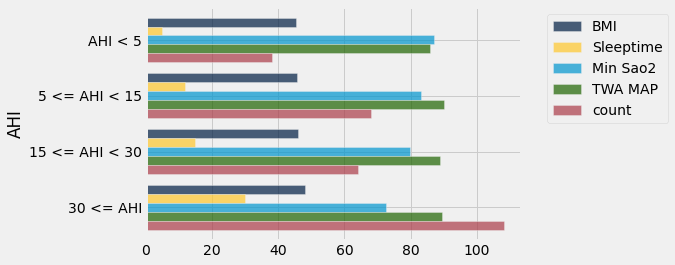

In [10]:
in_order.drop("severity").barh("AHI")

*note that these are all in different units, just wanted to combine them all into one graph*

### Histograms

Let's take a look at the distribution of our independent and dependent variables.

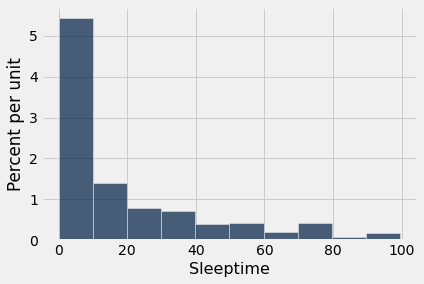

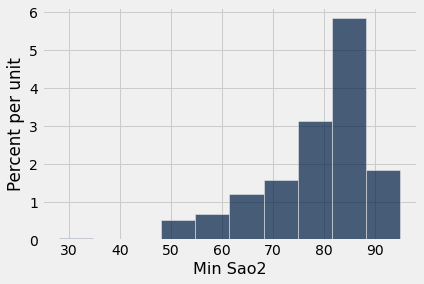

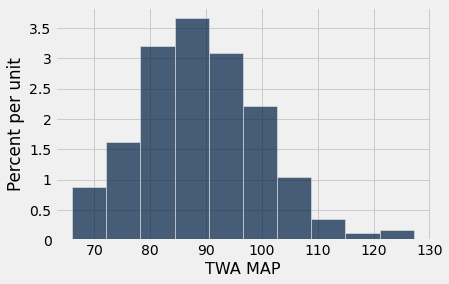

In [11]:
reduced.hist("Sleeptime")
reduced.hist("Min Sao2")
reduced.hist("TWA MAP")

Now our classification variables...

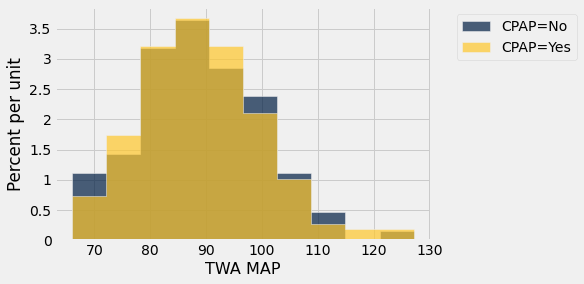

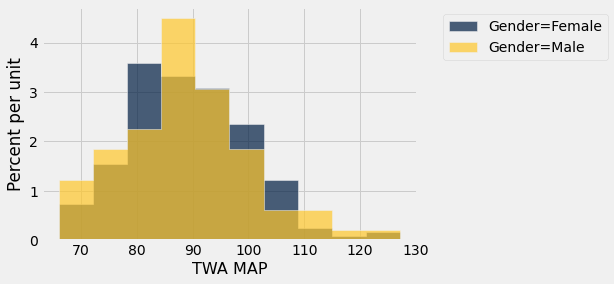

In [12]:
hypoxia_map.hist("TWA MAP", group = "CPAP")
hypoxia_gender.hist("TWA MAP", group = "Gender")

### Scatter Plot

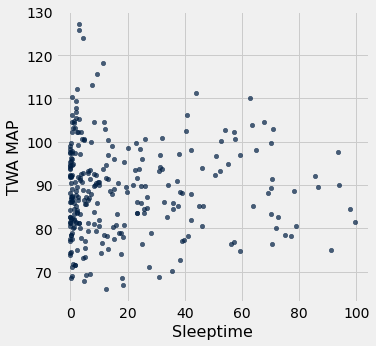

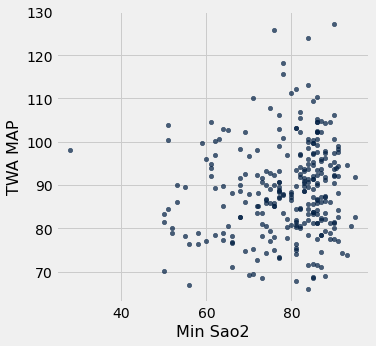

In [13]:
reduced.scatter("Sleeptime", "TWA MAP")
reduced.scatter("Min Sao2", "TWA MAP")
#reduced.scatter("Sleeptime", "TWA MAP", fit_line = True)
#reduced.scatter("Min Sao2", "TWA MAP", fit_line = True)

### Correlation Coefficient $r$

In [14]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)

In [15]:
def correlation(t, x, y): # define correlation function
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

In [16]:
correlation(reduced, "Sleeptime", "TWA MAP") # -0.02

-0.013870845551247232

In [17]:
correlation(reduced, "Min Sao2", "TWA MAP") # 0.13

0.1025075655108651

I suspect the difference we are seeing here between the clinic's findings and our own is their adjusting for smoking and coronary artery disease (bonferroni...?)

In [18]:
def tbl2df(tbl):
    """Convert a datascience.Table to a pandas.DataFrame"""
    return pd.DataFrame({x : tbl.column(x) for x in tbl.labels})

### Recreating the Clinic Figures

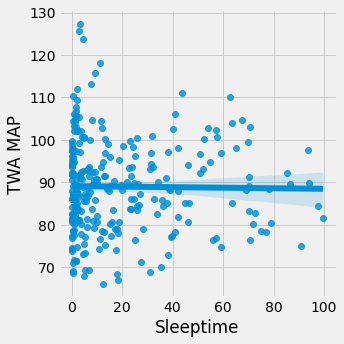

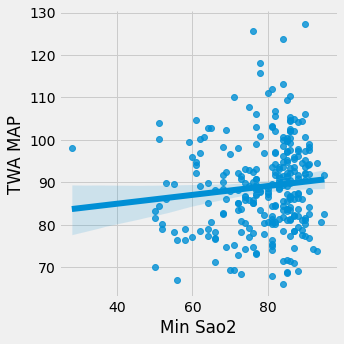

In [19]:
sns.lmplot(data = tbl2df(reduced), x = "Sleeptime", y = "TWA MAP", ci = 95) # 95% confidence interval
sns.lmplot(data = tbl2df(reduced), x = "Min Sao2", y = "TWA MAP", ci = 95) # 95% confidence interval

The solid lines are the fit regression lines and the shaded regions are the 95% confidence bands. 

### Colorful AHI

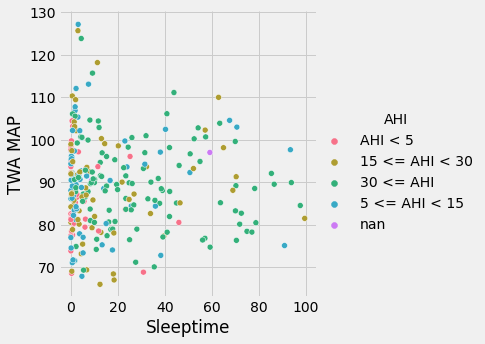

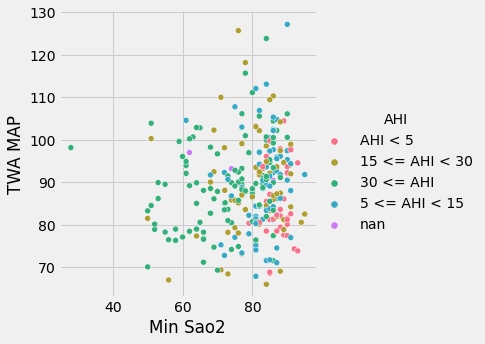

In [20]:
sns.relplot(data = tbl2df(hypoxia_map), x = "Sleeptime", y = "TWA MAP", hue = "AHI", palette = sns.color_palette("husl",5))
sns.relplot(data = tbl2df(hypoxia_map), x = "Min Sao2", y = "TWA MAP", hue = "AHI", palette = sns.color_palette("husl",5))

### Surgery Type & Heart Rate

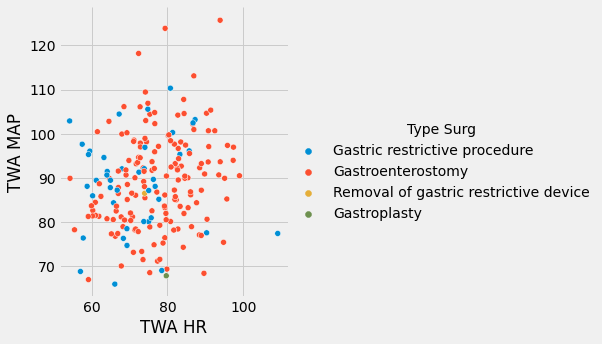

In [21]:
sns.relplot(data = tbl2df(hypoxia_map), x = "TWA HR", y = "TWA MAP", hue = "Type Surg")

---

## Classification

![k-nearest neighbors](https://www.romaglushko.com/static/dbb3359885e09bbbb66596868e221934/c5bb3/k-nearest-neighbors.png)

---

### Algorithm

To being our k-nearest neighbors algorithm, we are going to start by defining a distance function that returns the Euclidean distance between two different arrays of numerical features.

In [22]:
def distance(arr1, arr2):
    """Returns the distance between point1 and point2
    where each argument is an array 
    consisting of the coordinates of the point"""
    return np.sqrt(np.sum((arr1 - arr2)**2))

### Splitting the Dataset

We will be using an 20-80 test-train split on our data (80% of the data will be used for training and the remaining 20% for testing). This is an important part of the machine-learning process in which we are trying to predict an unknown value based on data that we already have.

In [23]:
# N = 281 patients (total observations)

# 281 * 0.2 = 56.2 -> 56 (testing)
# 281 * 0.8 = 224.8 -> 225 (training)

shuffled_table = hypoxia_gender.sample(with_replacement = False) # shuffle the table
train = shuffled_table.take(np.arange(225)) # allocate the first 225 cases to the training data set
test = shuffled_table.take(np.arange(225,281)) # allocate the rest to the testing data set

print("Training set:\t",   train.num_rows, "examples")
print("Test set:\t",       test.num_rows, "examples")
#train.show(5), test.show(5);

Training set:	 225 examples
Test set:	 56 examples


### Features

Next we are going to make an array of features that we are interested in classifying with (similar to how we made our reduced table). Note that we are only using *quantitative* variables.

In [24]:
features = make_array("Age", "BMI", "Sleeptime", "Min Sao2", "TWA MAP", "TWA HR")
features

array(['Age', 'BMI', 'Sleeptime', 'Min Sao2', 'TWA MAP', 'TWA HR'],
      dtype='<U9')

### Classify Function

In [25]:
def row_to_array(row, features):
    """Converts a row to an array of its features."""
    arr = make_array()
    for feature in features:
        arr = np.append(arr, row.item(feature))
    return arr

#### CPAP

In [26]:
def classify1(test_row, k, train):
    test_row_features_array = row_to_array(test_row, features)
    distances = make_array()
    for train_row in train.rows:
        train_row_features_array = row_to_array(train_row, features)
        row_distance = distance(test_row_features_array, train_row_features_array)
        distances = np.append(distances, row_distance)
    train_with_distances = train.with_column('Distance', distances)
    nearest_neighbors = train_with_distances.sort('Distance').take(np.arange(k))
    CPAP = nearest_neighbors.where('CPAP', are.equal_to('Yes')).num_rows
    noCPAP = nearest_neighbors.where('CPAP', are.equal_to('No')).num_rows
    if CPAP > noCPAP:
        most_common_label = 'CPAP'
    else:
        most_common_label = 'no CPAP'
    return most_common_label

In [27]:
CPAP_test = classify1(test.row(0), 5, train) # k = 5 neighbors
CPAP_test

'CPAP'

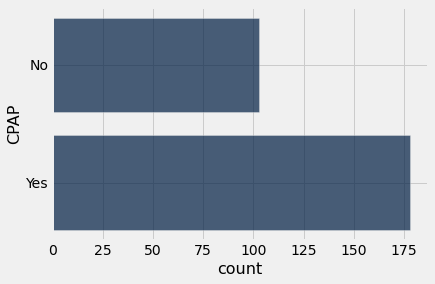

In [28]:
hypoxia_map.group("CPAP").barh("CPAP") # check our findings

#### CAD

In [29]:
def classify2(test_row, k, train):
    test_row_features_array = row_to_array(test_row, features)
    distances = make_array()
    for train_row in train.rows:
        train_row_features_array = row_to_array(train_row, features)
        row_distance = distance(test_row_features_array, train_row_features_array)
        distances = np.append(distances, row_distance)
    train_with_distances = train.with_column('Distance', distances)
    nearest_neighbors = train_with_distances.sort('Distance').take(np.arange(k))
    CAD = nearest_neighbors.where('CAD', are.equal_to('Yes')).num_rows
    noCAD = nearest_neighbors.where('CAD', are.equal_to('No')).num_rows
    if CAD > noCAD:
        most_common_label = 'CAD'
    else:
        most_common_label = 'no CAD'
    return most_common_label

In [30]:
CAD_test = classify2(test.row(0), 5, train) # k = 5 neighbors
CAD_test

'no CAD'

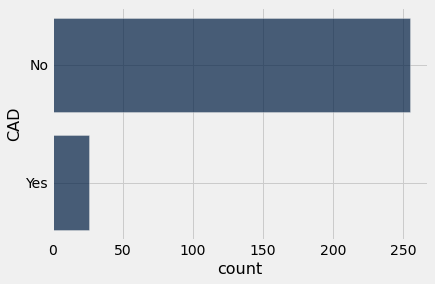

In [31]:
hypoxia_map.group("CAD").barh("CAD") # check our findings

### Accuracy

In [32]:
def three_classify(row): # k = 3 neighbors
    return classify1(row, 3, train) # CPAP

test_with_prediction = test.with_column('prediction', test.apply(three_classify))
labels_correct = test_with_prediction.where('CPAP', are.equal_to('Yes')).where('prediction', are.equal_to('CPAP')).num_rows + \
                 test_with_prediction.where('CPAP', are.equal_to('No')).where('prediction', are.equal_to('no CPAP')).num_rows
accuracy = labels_correct/test.num_rows
accuracy

0.5178571428571429

In [33]:
def three_classify(row): # k = 3 neighbors
    return classify2(row, 3, train) # CAD

test_with_prediction = test.with_column('prediction', test.apply(three_classify))
labels_correct = test_with_prediction.where('CAD', are.equal_to('Yes')).where('prediction', are.equal_to('CAD')).num_rows + \
                 test_with_prediction.where('CAD', are.equal_to('No')).where('prediction', are.equal_to('no CAD')).num_rows
accuracy = labels_correct/test.num_rows
accuracy

0.8392857142857143

Logically, accuracy increases as the number of neighbors increases.

---

## Analysis

Results from the report...

> neither percentage of total sleep time spent at Sao2 less than 90% nor minimum nocturnal Sao2 was associated with intraoperative time-weighted average of MAP
>
> the estimated average change in time-weighted average of MAP was −0.02 mmHg for each 1% absolute increase in the percentage of total sleep time spent at Sao2 less than 90%*
>
> the estimated average change was −0.13 mmHg for each 1% absolute decrease in the minimum nocturnal Sao2*

*after adjusting for smoking and coronary artery disease

---

## Discussion

Topics for further study in this project might include...

---

## Conclusion

This project was a fun and engaging way to implement what we have learned in this data science tutorial and apply it to real-world problems. While we may not have been able to find a significant relationship between our variables (as demonstrated by the clinic), it was still fun to play with the data and visualize it in different ways.

---

## Links

* [Chapter 10: Classification](https://www.jeffdoser.com/files/for875/_book/classification.html)
* [Cleveland Clinic Lerner Research Institute Datasets](https://www.lerner.ccf.org/qhs/datasets/datasets.php)
* [Computational and Inferential Thinking](https://inferentialthinking.com/chapters/intro.html)
* [Markdown and LaTeX Introduction](https://ashki23.github.io/markdown-latex.html)
* [Python Reference](http://data8.org/fa22/reference/)
* [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
* [Tables Generator](https://tablesgenerator.com/)

---